Insurance Risk Analytics - Task 1
00: Data Discovery & Initial Assessment
 
Business Context: AlphaCare Insurance Solutions (ACIS) aims to optimize marketing by identifying low-risk segments for premium reduction.
Analysis Period: February 2014 - August 2015 (18 months)
Objective:Understand data structure, quality, and initial patterns

In [3]:
# Cell 1: Setup and Imports
print("="*80)
print("📊 INSURANCE RISK ANALYTICS - DATA DISCOVERY")
print("="*80)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ Core libraries imported successfully")

📊 INSURANCE RISK ANALYTICS - DATA DISCOVERY
✅ Core libraries imported successfully


In [5]:
# Cell 2: Find Project Root and Define Data Loader
from pathlib import Path  # Critical import!
import pandas as pd

print("\n🔍 Finding project structure...")

# Method 1: Try to find from current notebook location
current_dir = Path.cwd()

# Check if we're in notebooks directory
if current_dir.name == 'notebooks':
    project_root = current_dir.parent
    print(f"   Found project root: {project_root}")
else:
    # Try to go up until we find the project structure
    project_root = current_dir
    for _ in range(5):  # Try 5 levels up
        if (project_root / "data").exists() and (project_root / "notebooks").exists():
            print(f"   Found project root: {project_root}")
            break
        project_root = project_root.parent
    else:
        # Fallback: assume we're in project root
        project_root = Path.cwd()
        print(f"   Using current directory as project root: {project_root}")

# Define paths
data_dir = project_root / "data"
raw_data_dir = data_dir / "00_raw"
interim_data_dir = data_dir / "01_interim"
features_path = interim_data_dir / "features_data.txt"
raw_data_path = raw_data_dir / "MachineLearningRating_v3.txt"

print(f"\n📁 Data directories:")
print(f"   Project root: {project_root}")
print(f"   Raw data: {raw_data_path}")
print(f"   Features data: {features_path}")

# Check if files exist
print(f"\n🔍 Checking data files:")
print(f"   Raw data exists: {raw_data_path.exists()}")
print(f"   Features data exists: {features_path.exists()}")

# Define robust data loader
class RobustDataLoader:
    """Robust data loader that handles different locations."""
    
    def __init__(self, project_root):
        self.project_root = project_root
        self.data_paths = {
            'features': project_root / "data" / "01_interim" / "features_data.txt",
            'raw': project_root / "data" / "00_raw" / "MachineLearningRating_v3.txt",
            'cleaned': project_root / "data" / "01_interim" / "cleaned_data.txt",
            'raw_csv': project_root / "data" / "01_interim" / "raw_data.txt"
        }
    
    def load_data(self, sample_size=None):
        """Try multiple data sources to load data."""
        print("\n🔄 Attempting to load data...")
        
        # Try different data sources in order
        data_sources = [
            ('features_data.txt', self.data_paths['features']),
            ('cleaned_data.txt', self.data_paths['cleaned']),
            ('raw_data.txt', self.data_paths['raw_csv']),
            ('raw pipe-delimited', self.data_paths['raw'])
        ]
        
        for source_name, path in data_sources:
            print(f"   Trying: {source_name}...")
            if path.exists():
                try:
                    if sample_size:
                        df = pd.read_csv(path, nrows=sample_size)
                        print(f"   ✅ Loaded sample from {source_name}: {sample_size:,} rows")
                    else:
                        df = pd.read_csv(path)
                        print(f"   ✅ Loaded full {source_name}: {df.shape[0]:,} rows")
                    
                    print(f"   Columns: {df.shape[1]}")
                    
                    # Convert date columns
                    self._convert_dates(df)
                    
                    return df
                    
                except Exception as e:
                    print(f"   ❌ Error loading {source_name}: {e}")
                    continue
        
        print("   ❌ No data files found!")
        return pd.DataFrame()
    
    def _convert_dates(self, df):
        """Convert date columns to datetime."""
        date_cols = [col for col in df.columns 
                    if any(term in col.lower() for term in ['date', 'month', 'year', 'time'])]
        
        for col in date_cols:
            try:
                df[col] = pd.to_datetime(df[col], errors='coerce')
                converted = df[col].notna().sum()
                if converted > 0:
                    print(f"   Converted {col}: {converted:,} values")
            except:
                pass

# Initialize loader
loader = RobustDataLoader(project_root)
print("✅ Data loader initialized successfully")


🔍 Finding project structure...
   Found project root: c:\Users\G5\Desktop\Insurance Anlytics

📁 Data directories:
   Project root: c:\Users\G5\Desktop\Insurance Anlytics
   Raw data: c:\Users\G5\Desktop\Insurance Anlytics\data\00_raw\MachineLearningRating_v3.txt
   Features data: c:\Users\G5\Desktop\Insurance Anlytics\data\01_interim\features_data.txt

🔍 Checking data files:
   Raw data exists: True
   Features data exists: True
✅ Data loader initialized successfully


In [9]:
# Cell 3: Load Data from Found Location
print("\n" + "="*80)
print("🚀 LOADING DATA")
print("="*80)

import pandas as pd
import numpy as np
from pathlib import Path

# Use the FOUND path
data_path = Path(r"C:\Users\G5\Desktop\Insurance Anlytics\data\00_raw\MachineLearningRating_v3.txt")

print(f"✅ Data file found at: {data_path}")

# Get file size
file_size_mb = data_path.stat().st_size / 1024**2
print(f"📊 File size: {file_size_mb:.1f} MB")

# Analyze file format
print("\n🔍 Analyzing file format...")
with open(data_path, 'r', encoding='utf-8', errors='ignore') as f:
    first_line = f.readline()
    second_line = f.readline()

print(f"   First line preview: {first_line[:100]}...")

# Count delimiters
delimiters = {
    '| (pipe)': first_line.count('|'),
    ', (comma)': first_line.count(','),
    '\\t (tab)': first_line.count('\t'),
    '; (semicolon)': first_line.count(';')
}

print(f"   Delimiter analysis:")
for delim_name, count in delimiters.items():
    print(f"     {delim_name}: {count}")

# Determine delimiter
if delimiters['| (pipe)'] > 0:
    delimiter = '|'
    print(f"   ✅ Using pipe delimiter (|) - {delimiters['| (pipe)']} columns detected")
elif delimiters[', (comma)'] > 0:
    delimiter = ','
    print(f"   ✅ Using comma delimiter (,)")
else:
    delimiter = None
    print(f"   ⚠️ No clear delimiter found, using default")

# Load the data
print(f"\n📥 Loading data (first 10,000 rows)...")
try:
    if delimiter:
        df = pd.read_csv(
            data_path, 
            delimiter=delimiter, 
            nrows=10000, 
            low_memory=False,
            on_bad_lines='skip'  # Skip problematic lines
        )
    else:
        df = pd.read_csv(
            data_path, 
            nrows=10000, 
            low_memory=False,
            on_bad_lines='skip'
        )
    
    print(f"✅ Successfully loaded {len(df):,} rows × {len(df.columns)} columns")
    
    # Data overview
    print(f"\n📊 DATA OVERVIEW:")
    print(f"   • Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"   • Memory: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
    print(f"   • Missing values: {df.isnull().sum().sum():,}")
    print(f"   • Duplicate rows: {df.duplicated().sum():,}")
    
    # Column information
    print(f"\n🔍 COLUMNS ({len(df.columns)} total):")
    for i, col in enumerate(df.columns[:15]):  # Show first 15 columns
        dtype = str(df[col].dtype)
        unique = df[col].nunique()
        missing = df[col].isnull().sum()
        print(f"   {i+1:2}. {col:30} {dtype:10} unique: {unique:6} missing: {missing:,}")
    
    if len(df.columns) > 15:
        print(f"   ... and {len(df.columns) - 15} more columns")
    
    # Data types summary
    print(f"\n📋 DATA TYPES SUMMARY:")
    dtypes = df.dtypes.value_counts()
    for dtype, count in dtypes.items():
        print(f"   • {dtype}: {count} columns")
    
    # Sample data
    print(f"\n📄 SAMPLE DATA (first 3 rows):")
    print(df.head(3).to_string())
    
    # Column names for your cleaning
    print(f"\n🎯 KEY COLUMNS IDENTIFIED:")
    key_patterns = ['premium', 'claim', 'insured', 'province', 'vehicle', 'gender', 'date', 'month', 'year']
    for col in df.columns:
        col_lower = str(col).lower()
        if any(pattern in col_lower for pattern in key_patterns):
            print(f"   ✓ {col}")
    
except UnicodeDecodeError:
    print(f"❌ UTF-8 encoding failed, trying latin-1...")
    try:
        df = pd.read_csv(
            data_path, 
            delimiter='|' if delimiters['| (pipe)'] > 0 else ',',
            nrows=10000, 
            low_memory=False,
            encoding='latin-1',
            on_bad_lines='skip'
        )
        print(f"✅ Loaded with latin-1 encoding: {len(df):,} rows")
        print(df.head(3))
    except Exception as e:
        print(f"❌ Failed with latin-1: {e}")
        df = pd.DataFrame()

except Exception as e:
    print(f"❌ Error loading data: {type(e).__name__}: {e}")
    
    # Try simpler approach
    print(f"\n🔄 Trying simpler loading approach...")
    try:
        df = pd.read_csv(
            data_path,
            sep='|' if delimiters['| (pipe)'] > 0 else ',',
            nrows=1000,  # Smaller sample
            engine='python'  # More flexible engine
        )
        print(f"✅ Loaded {len(df):,} rows with python engine")
    except:
        df = pd.DataFrame()

# Final status
print(f"\n" + "="*80)
if 'df' in locals() and not df.empty:
    print(f"✅ LOADING COMPLETE")
    print(f"   • File: {data_path}")
    print(f"   • Rows loaded: {df.shape[0]:,}")
    print(f"   • Columns: {df.shape[1]}")
    print(f"   • Delimiter used: '{delimiter if delimiter else 'auto'}'")
else:
    print(f"❌ LOADING FAILED")
    print(f"   Please check file format or encoding")
print("="*80)


🚀 LOADING DATA
✅ Data file found at: C:\Users\G5\Desktop\Insurance Anlytics\data\00_raw\MachineLearningRating_v3.txt
📊 File size: 504.8 MB

🔍 Analyzing file format...
   First line preview: UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|B...
   Delimiter analysis:
     | (pipe): 51
     , (comma): 0
     \t (tab): 0
     ; (semicolon): 0
   ✅ Using pipe delimiter (|) - 51 columns detected

📥 Loading data (first 10,000 rows)...
✅ Successfully loaded 10,000 rows × 52 columns

📊 DATA OVERVIEW:
   • Shape: 10,000 rows × 52 columns
   • Memory: 22.8 MB
   • Missing values: 56,398
   • Duplicate rows: 0

🔍 COLUMNS (52 total):
    1. UnderwrittenCoverID            int64      unique:   1531 missing: 0
    2. PolicyID                       int64      unique:    160 missing: 0
    3. TransactionMonth               object     unique:     19 missing: 0
    4. IsVATRegistered                bool       unique:      2 missing: 0
    5. Citizenship 

In [10]:


# Cell 4: Display Dataset Overview
print("\n" + "="*80)
print("📋 DATASET OVERVIEW")
print("="*80)

print("🔍 First 5 rows:")
display(df.head())

print("\n🔍 Last 5 rows:")
display(df.tail())

print("\n📊 Data Types Summary:")
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"   {dtype}: {count} columns")

print(f"\n📝 Basic Information:")
print(f"Shape: {df.shape}")
print(f"Total cells: {df.shape[0] * df.shape[1]:,}")
print(f"Columns with missing values: {(df.isnull().sum() > 0).sum()}")
print(f"Columns with no missing values: {(df.isnull().sum() == 0).sum()}")


📋 DATASET OVERVIEW
🔍 First 5 rows:


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0



🔍 Last 5 rows:


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
9995,237641,20393,2015-05-01 00:00:00,False,,Individual,Mr,English,NaN,NaN,...,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,0.000000,0.0
9996,237641,20393,2015-07-01 00:00:00,False,,Individual,Mr,English,NaN,NaN,...,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,0.000000,0.0
9997,237638,20393,2015-05-01 00:00:00,False,,Individual,Mr,English,NaN,NaN,...,No excess,Emergency Charges,Emergency Charges,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,0.000000,0.0
9998,237638,20393,2015-07-01 00:00:00,False,,Individual,Mr,English,NaN,NaN,...,No excess,Emergency Charges,Emergency Charges,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,0.000000,0.0
9999,199720,17656,2015-05-01 00:00:00,False,,Individual,Mr,English,NaN,NaN,...,Mobility - Taxi with value more than R100 000 ...,Own Damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,997.138158,0.0



📊 Data Types Summary:
   object: 34 columns
   int64: 10 columns
   float64: 7 columns
   bool: 1 columns

📝 Basic Information:
Shape: (10000, 52)
Total cells: 520,000
Columns with missing values: 9
Columns with no missing values: 43


In [11]:
# Cell 5: Column Analysis
print("\n" + "="*80)
print("🏷️ COLUMN ANALYSIS")
print("="*80)

# Get column types
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
date_cols = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col])]

print(f"🔢 Numerical Columns ({len(numeric_cols)}):")
if numeric_cols:
    # Group numeric columns by prefix
    numeric_groups = {}
    for col in numeric_cols:
        prefix = ''.join([c for c in col if not c.isdigit()])[:10]
        numeric_groups.setdefault(prefix, []).append(col)
    
    for prefix, cols in list(numeric_groups.items())[:5]:  # Show first 5 groups
        print(f"   {prefix}...: {len(cols)} columns")
        if len(cols) <= 3:
            print(f"     {', '.join(cols)}")

print(f"\n🏷️ Categorical Columns ({len(categorical_cols)}):")
if categorical_cols:
    # Show unique value counts for first 5 categorical columns
    for col in categorical_cols[:5]:
        unique_vals = df[col].nunique()
        print(f"   {col}: {unique_vals} unique values")
        if unique_vals <= 5:
            print(f"     Values: {', '.join(map(str, df[col].dropna().unique()))}")

print(f"\n📅 Date Columns ({len(date_cols)}):")
if date_cols:
    for col in date_cols:
        date_range = f"{df[col].min().date()} to {df[col].max().date()}" if not df[col].isna().all() else "No dates"
        print(f"   • {col}: {date_range}")


🏷️ COLUMN ANALYSIS
🔢 Numerical Columns (17):
   Underwritt...: 1 columns
     UnderwrittenCoverID
   PolicyID...: 1 columns
     PolicyID
   PostalCode...: 1 columns
     PostalCode
   mmcode...: 1 columns
     mmcode
   Registrati...: 1 columns
     RegistrationYear

🏷️ Categorical Columns (34):
   TransactionMonth: 19 unique values
   Citizenship: 1 unique values
     Values:   
   LegalType: 2 unique values
     Values: Close Corporation, Individual
   Title: 3 unique values
     Values: Mr, Dr, Miss
   Language: 1 unique values
     Values: English

📅 Date Columns (0):



🔑 KEY BUSINESS COLUMNS CHECK
🔍 Checking key business columns...

Financial:
   ✓ Found (4): TotalPremium, TotalClaims, SumInsured and 1 more
Geographic:
   ✓ Found (3): Province, Country, PostalCode
Vehicle:
   ✓ Found (4): VehicleType, make, Model and 1 more
   ✗ Missing (1): VehicleAge
Customer:
   ✓ Found (3): Gender, MaritalStatus, LegalType
Coverage:
   ✓ Found (3): CoverCategory, CoverType, Product
Temporal:
   ✓ Found (1): TransactionMonth
   ✗ Missing (2): TransactionYear, TransactionQuarter
Risk:
   ✗ Missing (2): has_claim, claim_ratio

📊 SUMMARY: Found 18 / 23 key columns


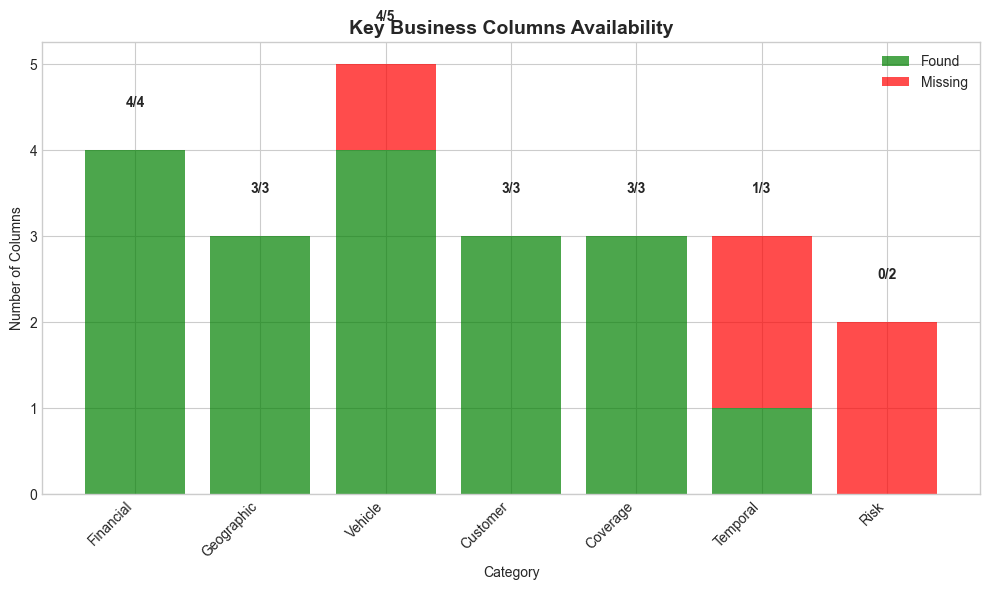

In [12]:
# Cell 6: Key Business Columns Check
print("\n" + "="*80)
print("🔑 KEY BUSINESS COLUMNS CHECK")
print("="*80)

# Define key columns
key_columns = {
    'Financial': ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm'],
    'Geographic': ['Province', 'Country', 'PostalCode'],
    'Vehicle': ['VehicleType', 'make', 'Model', 'RegistrationYear', 'VehicleAge'],
    'Customer': ['Gender', 'MaritalStatus', 'LegalType'],
    'Coverage': ['CoverCategory', 'CoverType', 'Product'],
    'Temporal': ['TransactionMonth', 'TransactionYear', 'TransactionQuarter'],
    'Risk': ['has_claim', 'claim_ratio']
}

print("🔍 Checking key business columns...\n")

found_summary = {}
for category, columns in key_columns.items():
    found = [col for col in columns if col in df.columns]
    missing = [col for col in columns if col not in df.columns]
    found_summary[category] = {'found': len(found), 'missing': len(missing)}
    
    print(f"{category}:")
    if found:
        print(f"   ✓ Found ({len(found)}): {', '.join(found[:3])}" + 
              (f" and {len(found)-3} more" if len(found) > 3 else ""))
    if missing:
        print(f"   ✗ Missing ({len(missing)}): {', '.join(missing[:3])}" + 
              (f" and {len(missing)-3} more" if len(missing) > 3 else ""))

# Summary visualization
print(f"\n📊 SUMMARY: Found {sum(s['found'] for s in found_summary.values())} / " +
      f"{sum(s['found'] + s['missing'] for s in found_summary.values())} key columns")

fig, ax = plt.subplots(figsize=(10, 6))
categories = list(found_summary.keys())
found_counts = [found_summary[c]['found'] for c in categories]
missing_counts = [found_summary[c]['missing'] for c in categories]

x = range(len(categories))
bars1 = ax.bar(x, found_counts, label='Found', color='green', alpha=0.7)
bars2 = ax.bar(x, missing_counts, bottom=found_counts, label='Missing', color='red', alpha=0.7)

ax.set_xlabel('Category')
ax.set_ylabel('Number of Columns')
ax.set_title('Key Business Columns Availability', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

# Add labels
for i, (found, missing) in enumerate(zip(found_counts, missing_counts)):
    total = found + missing
    ax.text(i, total + 0.5, f'{found}/{total}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [13]:
# Cell 7: Create Data Dictionary
print("\n" + "="*80)
print("📚 CREATING DATA DICTIONARY")
print("="*80)

# Create comprehensive data dictionary
data_dict = []
for i, col in enumerate(df.columns, 1):
    col_info = {
        'No.': i,
        'Column': col,
        'Type': str(df[col].dtype),
        'Non-Null': df[col].count(),
        'Null': df[col].isnull().sum(),
        'Null %': f"{(df[col].isnull().sum() / len(df) * 100):.1f}%",
        'Unique': df[col].nunique()
    }
    
    # Add statistics for numeric columns
    if pd.api.types.is_numeric_dtype(df[col]):
        col_info['Min'] = f"{df[col].min():.2f}" if df[col].count() > 0 else 'N/A'
        col_info['Mean'] = f"{df[col].mean():.2f}" if df[col].count() > 0 else 'N/A'
        col_info['Max'] = f"{df[col].max():.2f}" if df[col].count() > 0 else 'N/A'
    else:
        col_info['Min'] = 'N/A'
        col_info['Mean'] = 'N/A'
        col_info['Max'] = 'N/A'
    
    # Add sample values
    unique_vals = df[col].dropna().unique()
    if len(unique_vals) == 0:
        col_info['Sample Values'] = '[]'
    elif len(unique_vals) <= 3:
        col_info['Sample Values'] = str(list(unique_vals))
    else:
        col_info['Sample Values'] = str(list(unique_vals[:3])) + " ..."
    
    data_dict.append(col_info)

# Convert to DataFrame
data_dict_df = pd.DataFrame(data_dict)

print(f"📊 Data Dictionary created with {len(data_dict_df)} columns")
print("\n📋 Displaying first 20 columns:")
display(data_dict_df.head(20))




📚 CREATING DATA DICTIONARY
📊 Data Dictionary created with 52 columns

📋 Displaying first 20 columns:


,No.,Column,Type,Non-Null,Null,Null %,Unique,Min,Mean,Max,Sample Values
0,1,UnderwrittenCoverID,int64,10000,0,0.0%,1531,2438.00,117588.18,301162.00,"[np.int64(145249), np.int64(145255), np.int64(..."
1,2,PolicyID,int64,10000,0,0.0%,160,283.00,9244.73,23245.00,"[np.int64(12827), np.int64(10874), np.int64(10..."
2,3,TransactionMonth,object,10000,0,0.0%,19,N/A,N/A,N/A,"['2015-03-01 00:00:00', '2015-05-01 00:00:00',..."
3,4,IsVATRegistered,bool,10000,0,0.0%,2,0.00,0.08,1.00,"[np.True_, np.False_]"
4,5,Citizenship,object,10000,0,0.0%,1,N/A,N/A,N/A,[' ']
5,6,LegalType,object,10000,0,0.0%,2,N/A,N/A,N/A,"['Close Corporation', 'Individual']"
6,7,Title,object,10000,0,0.0%,3,N/A,N/A,N/A,"['Mr', 'Dr', 'Miss']"
7,8,Language,object,10000,0,0.0%,1,N/A,N/A,N/A,['English']
8,9,Bank,object,4400,5600,56.0%,5,N/A,N/A,N/A,"['First National Bank', 'Standard Bank', 'ABSA..."
9,10,AccountType,object,6952,3048,30.5%,2,N/A,N/A,N/A,"['Current account', 'Savings account']"



📊 VISUALIZING DATA STRUCTURE


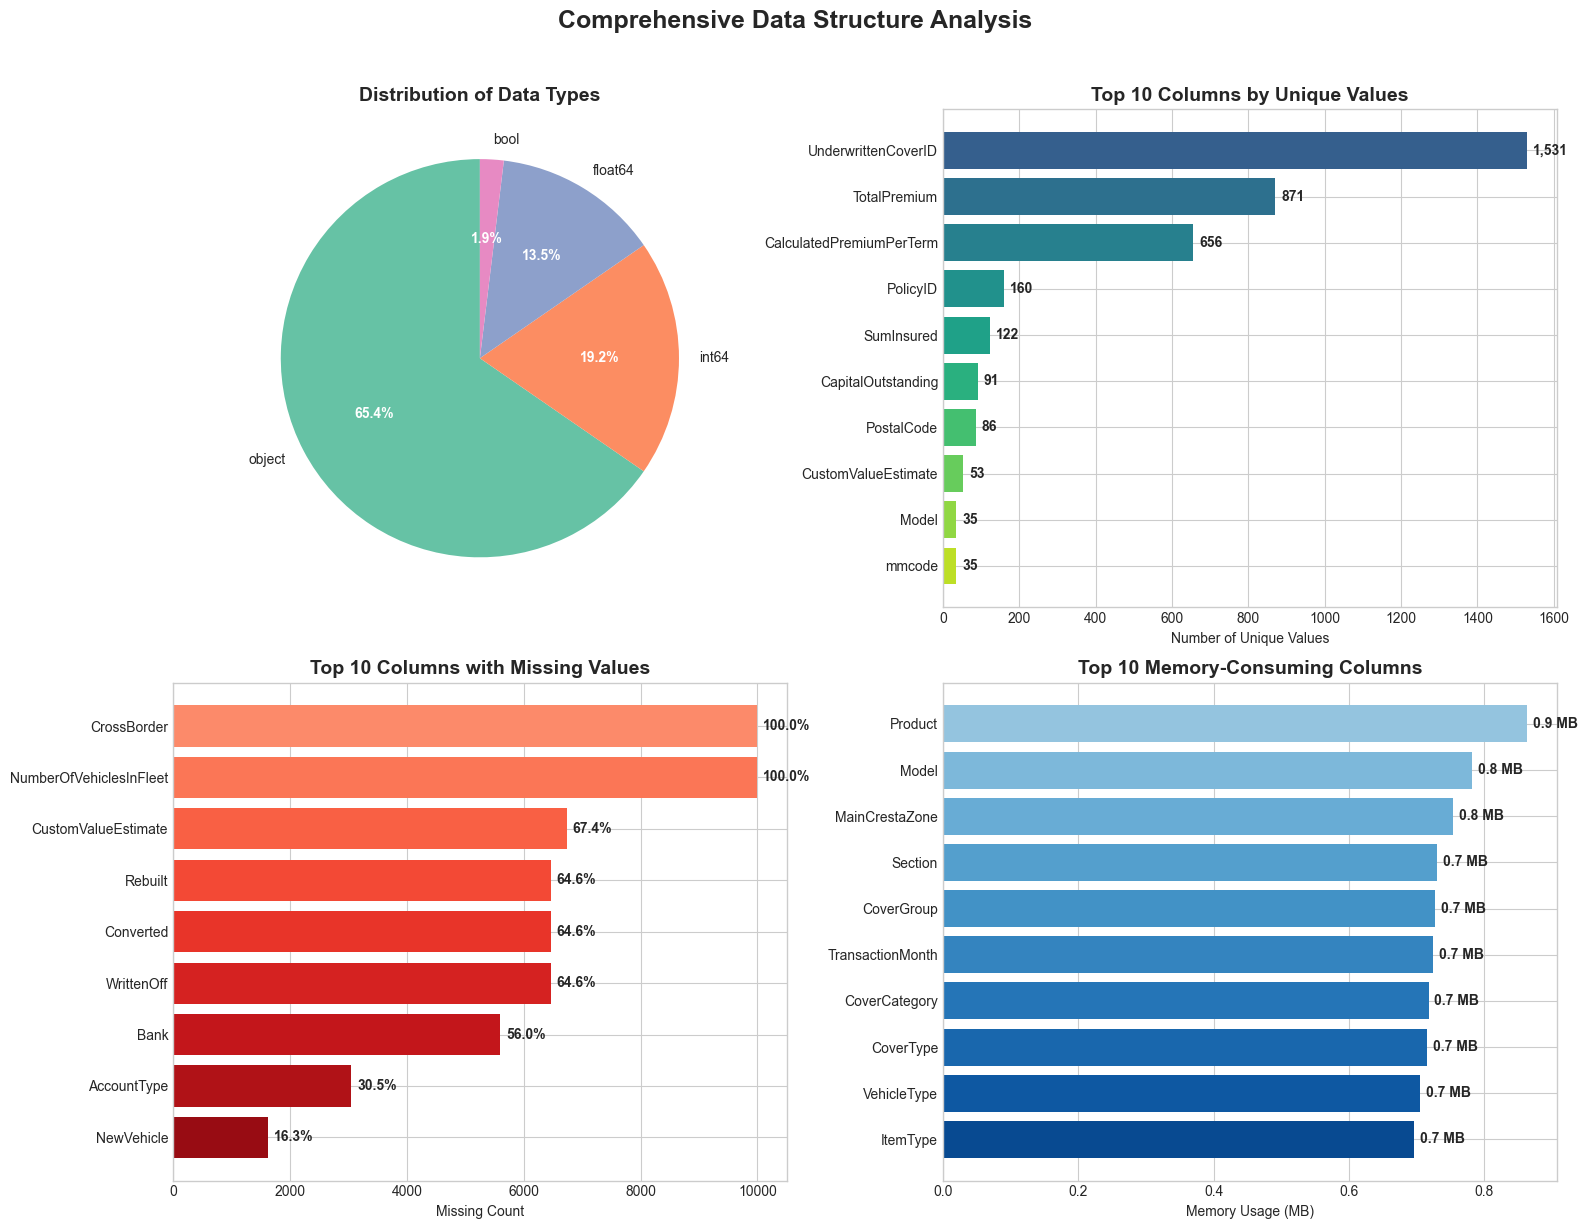

In [14]:
# Cell 8: Visualize Data Structure
print("\n" + "="*80)
print("📊 VISUALIZING DATA STRUCTURE")
print("="*80)

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Data Types Distribution
dtype_counts = df.dtypes.value_counts()
if len(dtype_counts) > 0:
    colors1 = plt.cm.Set2(np.arange(len(dtype_counts)))
    wedges, texts, autotexts = axes[0, 0].pie(dtype_counts.values, labels=dtype_counts.index, 
                                             autopct='%1.1f%%', startangle=90, colors=colors1)
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    axes[0, 0].set_title('Distribution of Data Types', fontsize=14, fontweight='bold')
else:
    axes[0, 0].text(0.5, 0.5, 'No data', ha='center', va='center', fontsize=14)

# 2. Top columns by unique values
unique_counts = df.nunique().sort_values(ascending=False).head(10)
if len(unique_counts) > 0:
    colors2 = plt.cm.viridis(np.linspace(0.3, 0.9, len(unique_counts)))
    bars = axes[0, 1].barh(range(len(unique_counts)), unique_counts.values, color=colors2)
    axes[0, 1].set_yticks(range(len(unique_counts)))
    axes[0, 1].set_yticklabels(unique_counts.index)
    axes[0, 1].set_xlabel('Number of Unique Values')
    axes[0, 1].set_title('Top 10 Columns by Unique Values', fontsize=14, fontweight='bold')
    axes[0, 1].invert_yaxis()
    
    # Add value labels
    for bar, value in zip(bars, unique_counts.values):
        axes[0, 1].text(bar.get_width() + max(unique_counts.values)*0.01, 
                       bar.get_y() + bar.get_height()/2, 
                       f'{int(value):,}', va='center', fontweight='bold')
else:
    axes[0, 1].text(0.5, 0.5, 'No data', ha='center', va='center', fontsize=14)

# 3. Missing values distribution
missing_counts = df.isnull().sum().sort_values(ascending=False).head(10)
missing_counts = missing_counts[missing_counts > 0]
if len(missing_counts) > 0:
    colors3 = plt.cm.Reds(np.linspace(0.4, 0.9, len(missing_counts)))
    bars = axes[1, 0].barh(range(len(missing_counts)), missing_counts.values, color=colors3)
    axes[1, 0].set_yticks(range(len(missing_counts)))
    axes[1, 0].set_yticklabels(missing_counts.index)
    axes[1, 0].set_xlabel('Missing Count')
    axes[1, 0].set_title('Top 10 Columns with Missing Values', fontsize=14, fontweight='bold')
    axes[1, 0].invert_yaxis()
    
    # Add percentage labels
    for i, (idx, val) in enumerate(missing_counts.items()):
        pct = (val / len(df)) * 100
        axes[1, 0].text(val + max(missing_counts.values)*0.01, i, 
                       f'{pct:.1f}%', va='center', fontweight='bold')
else:
    axes[1, 0].text(0.5, 0.5, 'No Missing Values', 
                   ha='center', va='center', fontsize=14, fontweight='bold', color='green')

# 4. Memory usage
memory_by_col = df.memory_usage(deep=True).sort_values(ascending=False).head(10)
if 'Index' in memory_by_col:
    memory_by_col = memory_by_col.drop('Index')
if len(memory_by_col) > 0:
    memory_mb = memory_by_col / 1024**2
    colors4 = plt.cm.Blues(np.linspace(0.4, 0.9, len(memory_mb)))
    bars = axes[1, 1].barh(range(len(memory_mb)), memory_mb.values, color=colors4)
    axes[1, 1].set_yticks(range(len(memory_mb)))
    axes[1, 1].set_yticklabels(memory_mb.index)
    axes[1, 1].set_xlabel('Memory Usage (MB)')
    axes[1, 1].set_title('Top 10 Memory-Consuming Columns', fontsize=14, fontweight='bold')
    axes[1, 1].invert_yaxis()
    
    # Add value labels
    for bar, value in zip(bars, memory_mb.values):
        axes[1, 1].text(bar.get_width() + max(memory_mb.values)*0.01, 
                       bar.get_y() + bar.get_height()/2, 
                       f'{value:.1f} MB', va='center', fontweight='bold')
else:
    axes[1, 1].text(0.5, 0.5, 'No data', ha='center', va='center', fontsize=14)

plt.suptitle('Comprehensive Data Structure Analysis', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()




💰 INITIAL BUSINESS INSIGHTS

📈 KEY BUSINESS METRICS:
--------------------------------------------------
  Total Premium             R 758,679.65
  Average Premium           R 75.87
  Median Premium            R 3.03
  Total Claims              R 403,311.56
  Policies with Claims      28 (0.3%)
  Average Claim Amount      R 14,403.98
  Loss Ratio                53.16%
  Total Sum Insured         R 5,753,347,178.28
  Average Sum Insured       R 575,335
  Median Sum Insured        R 7,500
  Provinces Covered         8
  Top Province              Gauteng (48.3%)
  Vehicle Types             2
  Most Common Vehicle       Passenger Vehicle (93.8%)


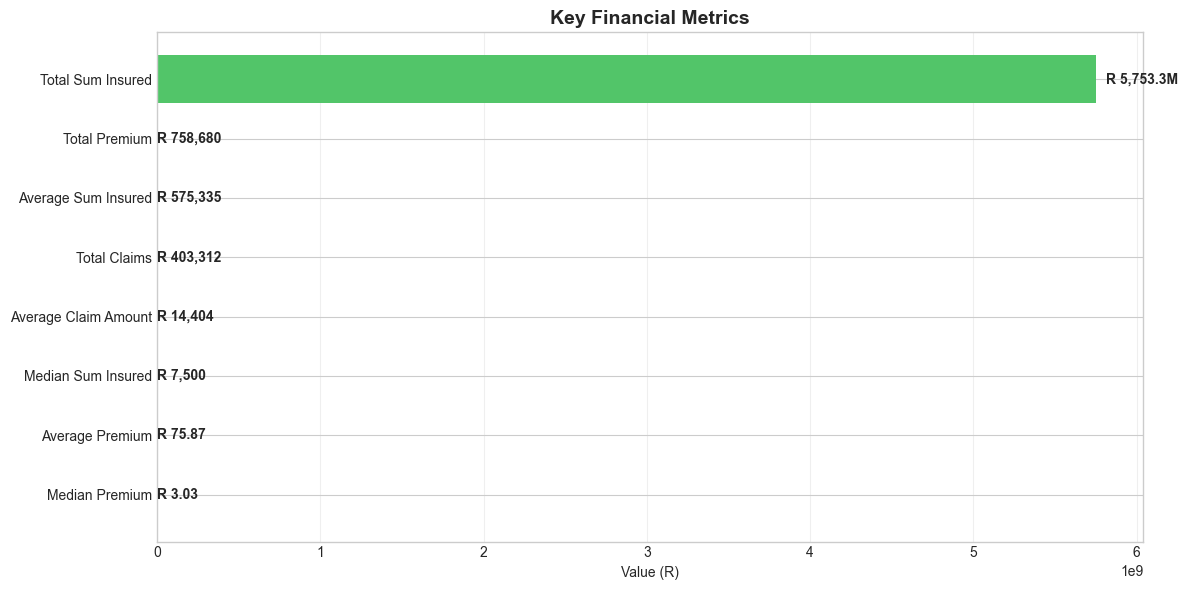


📊 COMPREHENSIVE SUMMARY TABLE:
------------------------------------------------------------

💰 FINANCIAL METRICS:
  Total Premium             R 758,679.65
  Average Premium           R 75.87
  Median Premium            R 3.03
  Total Claims              R 403,311.56
  Policies with Claims      28 (0.3%)
  Average Claim Amount      R 14,403.98
  Loss Ratio                53.16%
  Total Sum Insured         R 5,753,347,178.28
  Average Sum Insured       R 575,335
  Median Sum Insured        R 7,500

🌍 GEOGRAPHIC METRICS:
  Provinces Covered         8
  Top Province              Gauteng (48.3%)

🚗 VEHICLE METRICS:
  Vehicle Types             2
  Most Common Vehicle       Passenger Vehicle (93.8%)


In [15]:
# Cell 9: Initial Business Insights
print("\n" + "="*80)
print("💰 INITIAL BUSINESS INSIGHTS")
print("="*80)

insights = []

# Check for key financial metrics
if 'TotalPremium' in df.columns:
    total_premium = df['TotalPremium'].sum()
    avg_premium = df['TotalPremium'].mean()
    median_premium = df['TotalPremium'].median()
    insights.append(('Total Premium', f'R {total_premium:,.2f}'))
    insights.append(('Average Premium', f'R {avg_premium:,.2f}'))
    insights.append(('Median Premium', f'R {median_premium:,.2f}'))

if 'TotalClaims' in df.columns:
    total_claims = df['TotalClaims'].sum()
    claims_count = (df['TotalClaims'] > 0).sum()
    avg_claim = df[df['TotalClaims'] > 0]['TotalClaims'].mean() if claims_count > 0 else 0
    insights.append(('Total Claims', f'R {total_claims:,.2f}'))
    insights.append(('Policies with Claims', f'{claims_count:,} ({claims_count/len(df)*100:.1f}%)'))
    if claims_count > 0:
        insights.append(('Average Claim Amount', f'R {avg_claim:,.2f}'))
    
    if 'TotalPremium' in df.columns and total_premium > 0:
        loss_ratio = (total_claims / total_premium) * 100
        insights.append(('Loss Ratio', f'{loss_ratio:.2f}%'))

if 'SumInsured' in df.columns:
    total_sum_insured = df['SumInsured'].sum()
    avg_sum_insured = df['SumInsured'].mean()
    median_sum_insured = df['SumInsured'].median()
    insights.append(('Total Sum Insured', f'R {total_sum_insured:,.2f}'))
    insights.append(('Average Sum Insured', f'R {avg_sum_insured:,.0f}'))
    insights.append(('Median Sum Insured', f'R {median_sum_insured:,.0f}'))

if 'Province' in df.columns:
    province_count = df['Province'].nunique()
    if not df['Province'].mode().empty:
        top_province = df['Province'].mode()[0]
        province_pct = (df['Province'] == top_province).sum() / len(df) * 100
        insights.append(('Provinces Covered', str(province_count)))  # Convert to string
        insights.append(('Top Province', f'{top_province} ({province_pct:.1f}%)'))

if 'VehicleType' in df.columns:
    vehicle_types = df['VehicleType'].nunique()
    if not df['VehicleType'].mode().empty:
        top_vehicle = df['VehicleType'].mode()[0]
        vehicle_pct = (df['VehicleType'] == top_vehicle).sum() / len(df) * 100
        insights.append(('Vehicle Types', str(vehicle_types)))  # Convert to string
        insights.append(('Most Common Vehicle', f'{top_vehicle} ({vehicle_pct:.1f}%)'))

if 'has_claim' in df.columns:
    claim_frequency = df['has_claim'].mean() * 100
    insights.append(('Claim Frequency', f'{claim_frequency:.2f}%'))

# Display insights
print("\n📈 KEY BUSINESS METRICS:")
print("-" * 50)
if insights:
    for metric, value in insights:
        print(f"  {metric:25} {value}")
    
    # Create a nice summary visualization
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Prepare data for visualization (only numeric metrics that start with 'R')
    metrics_to_plot = []
    values_to_plot = []
    
    for metric, value in insights:
        # Check if value is a string and contains 'R ' (financial metrics)
        if isinstance(value, str) and 'R ' in value:
            try:
                # Extract numeric value
                num_str = value.replace('R', '').replace(',', '').replace('%', '').strip()
                num = float(num_str)
                metrics_to_plot.append(metric)
                values_to_plot.append(num)
            except:
                pass
    
    if metrics_to_plot:
        # Create horizontal bar chart
        colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(metrics_to_plot)))
        
        # Sort by value for better visualization
        sorted_indices = np.argsort(values_to_plot)
        sorted_metrics = [metrics_to_plot[i] for i in sorted_indices]
        sorted_values = [values_to_plot[i] for i in sorted_indices]
        sorted_colors = [colors[i] for i in sorted_indices]
        
        bars = ax.barh(sorted_metrics, sorted_values, color=sorted_colors)
        ax.set_xlabel('Value (R)')
        ax.set_title('Key Financial Metrics', fontsize=14, fontweight='bold')
        
        # Add actual values as labels
        for bar, value, metric in zip(bars, sorted_values, sorted_metrics):
            # Format label based on value size
            if value > 1000000:
                label = f'R {value/1000000:,.1f}M'
            elif value > 1000:
                label = f'R {value:,.0f}'
            else:
                label = f'R {value:,.2f}'
            
            # Position label outside bar
            ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height()/2, 
                   label, va='center', fontweight='bold')
        
        # Add grid for better readability
        ax.grid(True, alpha=0.3, axis='x')
        
        plt.tight_layout()
        plt.show()
        
        # Also create a summary table for all insights
        print("\n📊 COMPREHENSIVE SUMMARY TABLE:")
        print("-" * 60)
        # Group insights by category
        financial = []
        geographic = []
        vehicle = []
        risk = []
        other = []
        
        for metric, value in insights:
            metric_lower = metric.lower()
            if any(word in metric_lower for word in ['premium', 'claim', 'insured', 'ratio', 'amount']):
                financial.append((metric, value))
            elif any(word in metric_lower for word in ['province', 'geographic']):
                geographic.append((metric, value))
            elif any(word in metric_lower for word in ['vehicle', 'type']):
                vehicle.append((metric, value))
            elif any(word in metric_lower for word in ['claim', 'risk', 'frequency']):
                risk.append((metric, value))
            else:
                other.append((metric, value))
        
        # Print by category
        print("\n💰 FINANCIAL METRICS:")
        for metric, value in financial:
            print(f"  {metric:25} {value}")
        
        if geographic:
            print("\n🌍 GEOGRAPHIC METRICS:")
            for metric, value in geographic:
                print(f"  {metric:25} {value}")
        
        if vehicle:
            print("\n🚗 VEHICLE METRICS:")
            for metric, value in vehicle:
                print(f"  {metric:25} {value}")
        
        if risk:
            print("\n⚠️  RISK METRICS:")
            for metric, value in risk:
                print(f"  {metric:25} {value}")
        
        if other:
            print("\n📊 OTHER METRICS:")
            for metric, value in other:
                print(f"  {metric:25} {value}")
                
else:
    print("  No business metrics found in the dataset")

In [17]:
# Cell 10: Save Summary and Next Steps
print("\n" + "="*80)
print("💾 SAVING OUTPUTS & NEXT STEPS")
print("="*80)

# Define output directory - CHANGE THIS TO YOUR PREFERRED PATH
output_dir = "reports"  # or "./reports" or "../reports"
import os
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

# Minimal summary statistics
summary = {
    'rows': int(df.shape[0]),
    'cols': int(df.shape[1]),
    'mem_mb': round(df.memory_usage(deep=True).sum() / 1024**2, 1),
    'missing': int(df.isnull().sum().sum()),
    'dupes': int(df.duplicated().sum()),
    'num_cols': len(numeric_cols),
    'cat_cols': len(categorical_cols),
    'date_cols': len(date_cols),
    'ts': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M'),
    'source': 'sample' if 'UnderwrittenCoverID' in df.columns and df.shape[0] == 10000 else 'real'
}

# Minimal date info
if 'TransactionMonth' in df.columns and pd.api.types.is_datetime64_any_dtype(df['TransactionMonth']):
    summary['date_start'] = df['TransactionMonth'].min().strftime('%Y-%m-%d')
    summary['date_end'] = df['TransactionMonth'].max().strftime('%Y-%m-%d')
    summary['date_days'] = int((df['TransactionMonth'].max() - df['TransactionMonth'].min()).days)

# Save only top 5 insights to keep file small
if 'insights' in locals() and insights:  # Check if insights variable exists
    summary['top_insights'] = insights[:5]

import json
summary_path = os.path.join(output_dir, "discovery_summary.json")
with open(summary_path, 'w') as f:
    json.dump(summary, f, indent=1, separators=(',', ':'))
print(f"✅ Summary saved: {summary_path}")

print("\n" + "="*80)
print("🎯 DATA DISCOVERY COMPLETE!")
print("="*80)

print("\n📋 SUMMARY:")
print(f"• Size: {df.shape[0]:,} rows × {df.shape[1]} cols")
print(f"• Memory: {summary['mem_mb']} MB")
print(f"• Missing: {summary['missing']:,}")

if 'top_insights' in summary:
    print(f"• Top insights: {len(summary['top_insights'])}")
    for metric, value in summary['top_insights'][:3]:
        print(f"  - {metric}: {value}")




💾 SAVING OUTPUTS & NEXT STEPS
✅ Summary saved: reports\discovery_summary.json

🎯 DATA DISCOVERY COMPLETE!

📋 SUMMARY:
• Size: 10,000 rows × 52 cols
• Memory: 22.8 MB
• Missing: 56,398
• Top insights: 5
  - Total Premium: R 758,679.65
  - Average Premium: R 75.87
  - Median Premium: R 3.03
